In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel ('Train_dataset.xlsx')
df.head(20)


,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534
5,AA6,BSE,Materials,259.61,38182.08,10.63,153.05,19263869.0,8.04,0.03,0.0344,74.9,1.15,5.51,158.687016
6,AA7,NYSE,Healthcare,635.37,12765.84,67.21,29.63,7086103.0,5.87,0.78,0.0186,1.0,0.75,8.60,209.645870
7,AA8,NSE,Real Estate,187.43,11270.15,NaN,89.69,NaN,NaN,-0.43,0.0370,74.9,0.78,6.73,861.481269
8,AA9,NSE,Materials,950.81,11270.15,31.50,159.58,1361019.0,2.72,0.03,0.0534,74.9,1.22,6.46,514.240811
9,AA10,JSE,Healthcare,961.02,55722.00,72.16,29.61,14385395.0,7.87,0.78,0.0292,NaN,1.21,4.42,239.085804


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

In [51]:
df.isna().any()

Stock Index             False
Index                   False
Industry                False
VWAP                     True
General Index            True
NAV                      True
P/E Ratio                True
Volumes Traded           True
Inventory Turnover       True
Covid Impact (Beta)      True
Tracking Error           True
Dollar Exchange Rate     True
Put-Call Ratio           True
P/B Ratio                True
Stock Price             False
dtype: bool

In [52]:
print(df.corr())

                          VWAP  General Index       NAV  P/E Ratio  \
VWAP                  1.000000      -0.004724  0.001538  -0.015254   
General Index        -0.004724       1.000000 -0.005465   0.011714   
NAV                   0.001538      -0.005465  1.000000  -0.018836   
P/E Ratio            -0.015254       0.011714 -0.018836   1.000000   
Volumes Traded        0.004809      -0.000848 -0.014882  -0.004745   
Inventory Turnover   -0.007132       0.006377  0.006667  -0.001039   
Covid Impact (Beta)  -0.016439       0.009041  0.000555   0.003804   
Tracking Error       -0.007435      -0.007827  0.000818   0.009757   
Dollar Exchange Rate -0.011743       0.173546  0.007121  -0.005537   
Put-Call Ratio        0.004919       0.000137  0.010607  -0.003265   
P/B Ratio            -0.019294       0.000246 -0.012830   0.003308   
Stock Price           0.009221       0.008939  0.633058   0.683125   

                      Volumes Traded  Inventory Turnover  Covid Impact (Beta)  \
VWAP    

In [53]:
df['NAV']=df['NAV'].replace(np.nan,df['NAV'].mean())
df['P/E Ratio']=df['P/E Ratio'].replace(np.nan, df['P/E Ratio'].mean())
df.head(10)

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.380000,45.350000,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.250000,170.560000,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.270000,143.580000,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.660000,151.760000,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.790000,105.543623,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534
5,AA6,BSE,Materials,259.61,38182.08,10.630000,153.050000,19263869.0,8.04,0.03,0.0344,74.9,1.15,5.51,158.687016
6,AA7,NYSE,Healthcare,635.37,12765.84,67.210000,29.630000,7086103.0,5.87,0.78,0.0186,1.0,0.75,8.60,209.645870
7,AA8,NSE,Real Estate,187.43,11270.15,54.746004,89.690000,NaN,NaN,-0.43,0.0370,74.9,0.78,6.73,861.481269
8,AA9,NSE,Materials,950.81,11270.15,31.500000,159.580000,1361019.0,2.72,0.03,0.0534,74.9,1.22,6.46,514.240811
9,AA10,JSE,Healthcare,961.02,55722.00,72.160000,29.610000,14385395.0,7.87,0.78,0.0292,NaN,1.21,4.42,239.085804


In [54]:
df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [55]:
X=df[['NAV','P/E Ratio']]
y=df['Stock Price']


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm=LinearRegression()

In [60]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
print(lm.intercept_)

-566.6056265603178


In [62]:
lm.coef_

array([10.49094956,  5.32714899])

In [63]:
predictions=lm.predict(X_test)

In [64]:
predictions

array([666.02526431, 185.26191004, 996.26211634, ..., 310.92798819,
       205.2982256 , 531.48315058])

In [65]:
y_test

3681     606.085519
791      176.411884
6579    1044.952644
6042     661.475047
1952     900.006350
           ...     
427      636.972585
5590     133.856346
5402     182.063869
6635     114.966817
4715     481.526954
Name: Stock Price, Length: 2954, dtype: float64

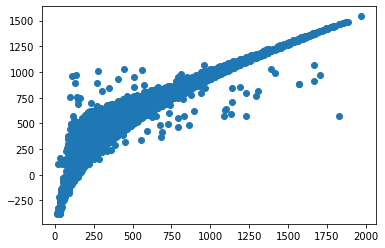

In [66]:
plt.scatter(y_test,predictions)

In [67]:
from sklearn import metrics

In [68]:
metrics.mean_absolute_error(y_test,predictions)

115.4016547702011

In [69]:
metrics.mean_squared_error(y_test,predictions)

25238.749779361937

In [70]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

158.86708211382853

In [71]:
metrics.explained_variance_score(y_test,predictions)

0.8610881817188059

In [72]:
df1 = pd.read_excel ('Test_dataset1.xlsx')
df1.head(20)

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66,NaN
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11,NaN
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99,NaN
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26,NaN
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18,NaN
5,AC3240,NSE,Healthcare,301.09,11270.15,25.27,149.36,9878930.0,8.17,0.78,0.0233,74.9,NaN,1.12,NaN
6,AC3241,BSE,Materials,227.28,38182.08,38.50,193.01,4934899.0,4.91,0.03,0.0265,74.9,1.23,4.60,NaN
7,AC3242,S&P 500,Real Estate,NaN,NaN,73.40,121.63,4070029.0,6.11,-0.43,0.0504,1.0,1.00,4.72,NaN
8,AC3243,NSE,Energy,NaN,NaN,54.33,169.47,13609149.0,4.93,0.11,0.0609,74.9,1.00,3.96,NaN
9,AC3244,NSE,Healthcare,727.98,11270.15,99.59,139.23,12499327.0,4.65,0.78,0.0206,74.9,1.07,2.58,NaN


In [73]:
df1['NAV']=df1['NAV'].replace(np.nan,df1['NAV'].mean())
df1['P/E Ratio']=df1['P/E Ratio'].replace(np.nan, df1['P/E Ratio'].mean())
df1.head(10)

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66,NaN
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11,NaN
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99,NaN
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26,NaN
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18,NaN
5,AC3240,NSE,Healthcare,301.09,11270.15,25.27,149.36,9878930.0,8.17,0.78,0.0233,74.9,NaN,1.12,NaN
6,AC3241,BSE,Materials,227.28,38182.08,38.50,193.01,4934899.0,4.91,0.03,0.0265,74.9,1.23,4.60,NaN
7,AC3242,S&P 500,Real Estate,NaN,NaN,73.40,121.63,4070029.0,6.11,-0.43,0.0504,1.0,1.00,4.72,NaN
8,AC3243,NSE,Energy,NaN,NaN,54.33,169.47,13609149.0,4.93,0.11,0.0609,74.9,1.00,3.96,NaN
9,AC3244,NSE,Healthcare,727.98,11270.15,99.59,139.23,12499327.0,4.65,0.78,0.0206,74.9,1.07,2.58,NaN


In [75]:
X_train1=df[['NAV','P/E Ratio']]
y_train1=df['Stock Price']
X_test1=df1[['NAV','P/E Ratio']]
y_test1=df1['Stock Price']

In [76]:
lm1=LinearRegression()

In [77]:
lm1.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
predictions=lm.predict(X_test1)

In [79]:
predictions

array([ 887.18782059,  392.99916775, 1305.9354545 , ...,  560.52486709,
        590.98804303, 1155.53100703])

In [84]:
df1['Stock Price']=predictions

In [85]:
df1['Stock Price']

0        887.187821
1        392.999168
2       1305.935454
3        827.650720
4        384.768839
           ...     
3326     209.955180
3327     560.524867
3328     560.524867
3329     590.988043
3330    1155.531007
Name: Stock Price, Length: 3331, dtype: float64

In [86]:
df1.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66,887.187821
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11,392.999168
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99,1305.935454
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26,827.650720
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18,384.768839


In [90]:
df1.to_excel('Task1.xlsx')